<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
# Exploratory Data Analysis I

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [How may matches were played and how did each team performed?](#section401)<br/>
    - 4.2 [How many matches lasted till last over?](#section402)<br/>
    - 4.3 [How did team performed in last five overs (key statistics) ?](#section403)<br/>
    - 4.4 [Wins/losses - Comparing key stats and bat first/bowl first games.](#section404)<br/>
    - 4.5 [Wins/losses - Comparing key stats and bat toss win/loss games.](#section405)<br/>
    - 4.6 [Segment over in bins and compare performance.](#section406)<br/>
    - 4.7 [Draw pair plot to know the joint relationship between 'Wicket','Boundaries','Dot Balss' and 'Result'](#section407)<br/>
    - 4.8 [Establish coorelation between all the features using heatmap.](#section408)<br/>
    - 4.9 [Hypothesis: Impact of team performance in last five over on result?](#section409)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>

### 1. Problem Statement

The __Exploratory Data Analysis(EDA)__ of __IPL_ __Deliveries__ and __Matches__ dataset using __Pandas__  to and perform data __cleaning__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analyzing team performance in last five overs and its impact on result.

* __Exploratory Data Analysis__ <br/>
    - Understand Deliveries and Matches Data
    - Transform data to analyze and draw conclusion

<a id=section2></a>

### 2. Data Loading and Description
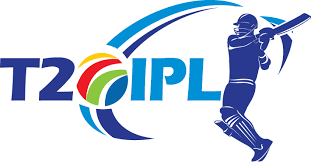

<a id=section201></a>

* __The dataset consists of the information about all Indian Premier League Cricket matches between 2008 and 2016. The dataset contains 2 files: deliveries.csv and matches.csv.__ 
* __The dataset comprises of__ 
    - matches.csv contains details related to the match such as location, contesting teams, umpires, results, etc.
    - deliveries.csv is the ball-by-ball data of all the IPL matches including data of the batting team, batsman, bowler, non-striker, runs scored, etc.


#### Some Background Information
The __Indian Premier League (IPL)__ is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India.The league was founded by the __Board of Control for Cricket in India (BCCI) in 2008__. IPL has an exclusive window in ICC Future Tours Programme.

The IPL is the __most-attended__ cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues.In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube.__The brand value of IPL in 2018 was US$6.3 billion__, according to Duff & Phelps.According to BCCI, the 2015 IPL season contributed ₹11.5 billion to the GDP of the Indian economy.

There have been twelve seasons of the IPL tournament. The current IPL title holders are the Mumbai Indians, who won the 2019 season.

#### Importing packages                                          

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output



In [ ]:
import sys
!{sys.executable} -m pip install pandas-profiling

#### Importing the Dataset

In [2]:
deliveries_data = pd.read_csv("deliveries.csv")     # Importing training dataset using pd.read_csv
matches_data = pd.read_csv("matches.csv")     # Importing training dataset using pd.read_csv

<a id=section3></a>

## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>

### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [3]:
matches_data.shape                                                    # This will print the number of rows and comlumns of the Data Frame

(696, 18)

In [4]:
matches_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


matches_data has __696 rows__ and __18 columns.__

In [5]:
matches_data.columns                                            # This will print the names of all columns.

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
matches_data.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
691,7949,2018,Pune,20/05/18,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,L Ngidi,Maharashtra Cricket Association Stadium,Nitin Menon,Yeshwant Barde,Marais Erasmus
692,7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi
693,7951,2018,Kolkata,23/05/18,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kolkata Knight Riders,25,0,AD Russell,Eden Gardens,Nitin Menon,Anil Chaudhary,Kumar Dharmasena
694,7952,2018,Kolkata,25/05/18,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,14,0,Rashid Khan,Eden Gardens,Nitin Menon,Kumar Dharmasena,Anil Chaudhary
695,7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon


In [8]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


In [9]:
matches_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

Surprisingly umpire info is not available for 1 match. Also 3rd umpire data is not available for most of matches.
City info is not available for few matches. Need to review data and understand.
Winner and player of match data is not available for 3 matches, may be no result. Need to review.

In [10]:
matches_data[matches_data['umpire1'].isnull()]        # Match missing umpire1,2 & 3 data.

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


We do not need umpire information for analysis, this should not be issue.

In [11]:
matches_data[matches_data['city'].isnull()].head()       # Matches missing city data.

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN


City is missing for matches played at Dubai International Cricket Stadium in 2014.
We do not need city data for analysis, we can ignore city column.

In [12]:
matches_data[matches_data['winner'].isnull()]        # Matches missing winner data.

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


These are all no result matches, hence no data issues.

In [13]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [14]:
deliveries_data.shape                                                    # This will print the number of rows and comlumns of the Data Frame

(164750, 21)

In [15]:
deliveries_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

<a id=section301></a>

In [16]:
deliveries_data.tail()                                                   # This will print the last n rows of the Data Frame

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
164745,7953,2,Chennai Super Kings,Sunrisers Hyderabad,18,5,SR Watson,AT Rayudu,S Kaul,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
164746,7953,2,Chennai Super Kings,Sunrisers Hyderabad,18,6,SR Watson,AT Rayudu,S Kaul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
164747,7953,2,Chennai Super Kings,Sunrisers Hyderabad,19,1,AT Rayudu,SR Watson,CR Brathwaite,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
164748,7953,2,Chennai Super Kings,Sunrisers Hyderabad,19,2,AT Rayudu,SR Watson,CR Brathwaite,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
164749,7953,2,Chennai Super Kings,Sunrisers Hyderabad,19,3,AT Rayudu,SR Watson,CR Brathwaite,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [17]:
deliveries_data.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
match_id            164750 non-null int64
inning              164750 non-null int64
batting_team        164750 non-null object
bowling_team        164750 non-null object
over                164750 non-null int64
ball                164750 non-null int64
batsman             164750 non-null object
non_striker         164750 non-null object
bowler              164750 non-null object
is_super_over       164750 non-null int64
wide_runs           164750 non-null int64
bye_runs            164750 non-null int64
legbye_runs         164750 non-null int64
noball_runs         164750 non-null int64
penalty_runs        164750 non-null int64
batsman_runs        164750 non-null int64
extra_runs          164750 non-null int64
total_runs          164750 non-null int64
player_dismissed    8157 non-null object
dismissal_kind      8157 non-null object
fielder             5918 non-null object
dtype

deliveries_data has __164750 rows__ and __21 columns.__

In [18]:
deliveries_data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    156593
dismissal_kind      156593
fielder             158832
dtype: int64

Player_dismissed, dismissal_kind and filder information is empty. Need review such records.

In [19]:
deliveries_data[deliveries_data['player_dismissed'].isnull()].head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Dismissal and filder is not applicable to each delivery, thus not data issue.

<a id=section302></a>

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [20]:
profile = pandas_profiling.ProfileReport(matches_data)
profile.to_file(output_file="matches_before_preprocessing.html",)

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __matches_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

In [21]:
profile_deliveries = pandas_profiling.ProfileReport(deliveries_data)
profile_deliveries.to_file(output_file="deliveries_before_preprocessing.html",)

<a id=section303></a>

### 3.3 Preprocessing

- Matches dataset dealing with missing values<br/>
    - Missing entries of __City & Umpires__ is not concern.
- Deliveries dataset dealing with missing values<br/>
    - Missing entries of __Dismissal & Fielder__ is not concern.

- Add columns to deliveries data set to keep track of count of no balls, wide balls, wicket balls, dot balls and boundary balls
- Add over group column to deliveries data set categories overs into Power Play, middle overs and last 5 overs
- Team batting and bowling data need to be gather from across innings for a given match. Split batting team performance and bowling team performance into separate rows and then group by match and team to merge.
- Join delieries data with matches data on match id, normalize data.
- Add columns to new data set (join of deliveries and match) to track toss winner and winner for eatch delivery.
- Drop no result matches.
- Drop team which featureed in few seasons only (Pune, Gujrat Lions, Kochi)
- Drop Super Over games
- Drop rain effected matches.
- Randomly selected 350 matches for analysis

In [22]:
deliveries_data['no_balls']=np.where(deliveries_data['noball_runs']>0,1,0)
deliveries_data['wide_balls']=np.where(deliveries_data['wide_runs']>0,1,0)
deliveries_data['wicket_balls']=np.where(deliveries_data['dismissal_kind'].isnull(),0,1)
deliveries_data['dot_balls']=np.where(deliveries_data['total_runs']==0,1,0)
deliveries_data['boundary_balls']=np.where(deliveries_data['batsman_runs'].isin([4,6]),1,0)

- Add column to bucket overs

In [23]:
deliveries_data['over_group']=pd.cut(deliveries_data['over'].dropna(),
                         [1,6,15,20],
                         labels=['First Power Play','Middle Overs','Last 5'], include_lowest=True)

In [24]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,total_runs,player_dismissed,dismissal_kind,fielder,no_balls,wide_balls,wicket_balls,dot_balls,boundary_balls,over_group
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,NaN,NaN,NaN,0,0,0,1,0,First Power Play
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,NaN,NaN,NaN,0,0,0,1,0,First Power Play
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,4,NaN,NaN,NaN,0,0,0,0,1,First Power Play
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,NaN,NaN,NaN,0,0,0,1,0,First Power Play
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,2,NaN,NaN,NaN,0,1,0,0,0,First Power Play


- Team batting and bowling data need to be gather from across innings for a given match. 
Split batting team performance and bowling team performance into separate rows and then group by match and team to merge.

In [25]:
# Segregate batting team and bowling team stats

#Copy and prepare batting data
deliveries_batting_data = deliveries_data.filter(deliveries_data.columns, axis=1)
deliveries_batting_data.rename({'batting_team':'team','bowling_team':'opponent_team'}, axis='columns',inplace=True)
# Set bowling data related columns to 0
deliveries_batting_data['no_balls'],deliveries_batting_data['wide_balls'],deliveries_batting_data['wicket_balls'],deliveries_batting_data['dot_balls']=0,0,0,0
deliveries_batting_data.head()

#Copy and prepare bowling data data
deliveries_bowling_data = deliveries_data.filter(deliveries_data.columns, axis=1)
deliveries_bowling_data.rename({'bowling_team':'team','batting_team':'opponent_team'}, axis='columns',inplace=True)
# Set bowling data related columns to 0
deliveries_bowling_data['boundary_balls']=0
deliveries_bowling_data.head()


,match_id,inning,opponent_team,team,over,ball,batsman,non_striker,bowler,is_super_over,...,total_runs,player_dismissed,dismissal_kind,fielder,no_balls,wide_balls,wicket_balls,dot_balls,boundary_balls,over_group
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,NaN,NaN,NaN,0,0,0,1,0,First Power Play
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,NaN,NaN,NaN,0,0,0,1,0,First Power Play
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,4,NaN,NaN,NaN,0,0,0,0,0,First Power Play
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,NaN,NaN,NaN,0,0,0,1,0,First Power Play
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,2,NaN,NaN,NaN,0,1,0,0,0,First Power Play


In [26]:
def process_deliveries_match_data(deliveries_df, matches_df):
    """Function to merge deliveries and matches data. Normalize data will be used for analysis"""
    deliveries_df=pd.merge(deliveries_df, matches_df,  how='left', left_on='match_id', right_on = 'id')
    deliveries_df.head()
    
    deliveries_df['ball_number']=deliveries_df['over']+(deliveries_df['ball']/10)
    
    #Drop colums not required for analysis.
    deliveries_df.drop(['id','umpire1','umpire2','umpire3','win_by_runs','win_by_wickets','player_of_match','city', 'date', 'team1', 'team2'], axis='columns',inplace=True)
    deliveries_df.drop(['ball','batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs','bye_runs', 'legbye_runs', 'noball_runs','penalty_runs','batsman_runs','extra_runs', 'total_runs', 'player_dismissed','dismissal_kind', 'fielder'], axis='columns',inplace=True)
    
    #Set winner and toss winner for each data record
    deliveries_df['winner']=np.where(deliveries_df['team']==deliveries_df['winner'],1,0)
    deliveries_df['toss_winner']=np.where(deliveries_df['team']==deliveries_df['toss_winner'],1,0)

    #Populate toss decision type based on toss winner and toss decision
    deliveries_df['toss_decision_type']=''
    deliveries_df.loc[(deliveries_df['toss_winner']==1) &( deliveries_df['toss_decision']=='bat'),['toss_decision_type']]='Won Toss - Opted To Bat'
    deliveries_df.loc[(deliveries_df['toss_winner']==0) &( deliveries_df['toss_decision']=='bat'),['toss_decision_type']]='Loss Toss - Asked To Field'
    deliveries_df.loc[(deliveries_df['toss_winner']==1) &( deliveries_df['toss_decision']=='field'),['toss_decision_type']]='Won Toss - Opted To Field'
    deliveries_df.loc[(deliveries_df['toss_winner']==0) &( deliveries_df['toss_decision']=='field'),['toss_decision_type']]='Loss Toss - Asked To Bat'

    
    return deliveries_df


- Merge deliveries and matches data

In [27]:
bowling_match_data= process_deliveries_match_data(deliveries_bowling_data,matches_data)
batting_match_data= process_deliveries_match_data(deliveries_batting_data,matches_data)


batting_match_data.head()

,match_id,inning,team,opponent_team,over,no_balls,wide_balls,wicket_balls,dot_balls,boundary_balls,over_group,season,toss_winner,toss_decision,result,dl_applied,winner,venue,ball_number,toss_decision_type
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,0,0,0,0,0,First Power Play,2017,0,field,normal,0,1,"Rajiv Gandhi International Stadium, Uppal",1.1,Loss Toss - Asked To Bat
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,0,0,0,0,0,First Power Play,2017,0,field,normal,0,1,"Rajiv Gandhi International Stadium, Uppal",1.2,Loss Toss - Asked To Bat
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,0,0,0,0,1,First Power Play,2017,0,field,normal,0,1,"Rajiv Gandhi International Stadium, Uppal",1.3,Loss Toss - Asked To Bat
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,0,0,0,0,0,First Power Play,2017,0,field,normal,0,1,"Rajiv Gandhi International Stadium, Uppal",1.4,Loss Toss - Asked To Bat
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,0,0,0,0,0,First Power Play,2017,0,field,normal,0,1,"Rajiv Gandhi International Stadium, Uppal",1.5,Loss Toss - Asked To Bat


In [28]:
batting_match_data.columns


Index(['match_id', 'inning', 'team', 'opponent_team', 'over', 'no_balls',
       'wide_balls', 'wicket_balls', 'dot_balls', 'boundary_balls',
       'over_group', 'season', 'toss_winner', 'toss_decision', 'result',
       'dl_applied', 'winner', 'venue', 'ball_number', 'toss_decision_type'],
      dtype='object')

In [29]:
bowling_match_data.columns

Index(['match_id', 'inning', 'opponent_team', 'team', 'over', 'no_balls',
       'wide_balls', 'wicket_balls', 'dot_balls', 'boundary_balls',
       'over_group', 'season', 'toss_winner', 'toss_decision', 'result',
       'dl_applied', 'winner', 'venue', 'ball_number', 'toss_decision_type'],
      dtype='object')

In [30]:
#Align data frame columns to prepare for concatation
bowling_match_data=bowling_match_data[batting_match_data.columns]
bowling_match_data.columns
# Append batting and bowling data frames
deliveries_overall_data = pd.concat([batting_match_data,bowling_match_data]) 
deliveries_overall_data.shape
deliveries_overall_data.tail()

,match_id,inning,team,opponent_team,over,no_balls,wide_balls,wicket_balls,dot_balls,boundary_balls,over_group,season,toss_winner,toss_decision,result,dl_applied,winner,venue,ball_number,toss_decision_type
164745,7953,2,Sunrisers Hyderabad,Chennai Super Kings,18,0,0,0,0,0,Last 5,2018,0,field,normal,0,0,Wankhede Stadium,18.5,Loss Toss - Asked To Bat
164746,7953,2,Sunrisers Hyderabad,Chennai Super Kings,18,0,0,0,1,0,Last 5,2018,0,field,normal,0,0,Wankhede Stadium,18.6,Loss Toss - Asked To Bat
164747,7953,2,Sunrisers Hyderabad,Chennai Super Kings,19,0,0,0,1,0,Last 5,2018,0,field,normal,0,0,Wankhede Stadium,19.1,Loss Toss - Asked To Bat
164748,7953,2,Sunrisers Hyderabad,Chennai Super Kings,19,0,0,0,1,0,Last 5,2018,0,field,normal,0,0,Wankhede Stadium,19.2,Loss Toss - Asked To Bat
164749,7953,2,Sunrisers Hyderabad,Chennai Super Kings,19,0,0,0,0,0,Last 5,2018,0,field,normal,0,0,Wankhede Stadium,19.3,Loss Toss - Asked To Bat


In [31]:
deliveries_overall_data.columns

Index(['match_id', 'inning', 'team', 'opponent_team', 'over', 'no_balls',
       'wide_balls', 'wicket_balls', 'dot_balls', 'boundary_balls',
       'over_group', 'season', 'toss_winner', 'toss_decision', 'result',
       'dl_applied', 'winner', 'venue', 'ball_number', 'toss_decision_type'],
      dtype='object')

In [32]:
deliveries_overall_data.shape

(329500, 20)

In [33]:
deliveries_summay_data= deliveries_overall_data.groupby(['match_id', 'inning', 'team', 'opponent_team', 'over','season', 'toss_winner', 'toss_decision', 'result','dl_applied', 'winner', 'venue','toss_decision_type']).agg({
    'no_balls':sum,'wide_balls':sum, 'wicket_balls':sum, 'dot_balls':sum, 'boundary_balls':sum,'over_group':max
})



deliveries_summay_data.head()

no_balls  \
match_id inning team                        opponent_team       over season toss_winner toss_decision result dl_applied winner venue                                     toss_decision_type                    
1        1      Royal Challengers Bangalore Sunrisers Hyderabad 1    2017   1           field         normal 0          0      Rajiv Gandhi International Stadium, Uppal Won Toss - Opted To Field         0   
                                                                2    2017   1           field         normal 0          0      Rajiv Gandhi International Stadium, Uppal Won Toss - Opted To Field         1   
                                                                3    2017   1           field         normal 0          0      Rajiv Gandhi International Stadium, Uppal Won Toss - Opted To Field         0   
                                                                4    2017   1           field         normal 0          0      Rajiv Gandhi International Stadium, Uppal Won Toss - Opted To Field         0   
                                                                5    2017   1           field         normal 0          0      Rajiv Gandhi International Stadium, Uppal Won Toss - Opted To Field         0   

                                                                                                                                                                                                    wide_balls  \
match_id inning team                        opponent_team       over season toss_winner toss_decision result dl_applied winner venue                                     toss_decision_type                      
1        1      Royal Challengers Bangalore Sunrisers Hyderabad 1    2017   1           field         normal 0          0      Rajiv Gandhi International Stadium, Uppal Won Toss - Opted To Field           1   
                                                                2    2017   1           field         normal 0          0      Rajiv Gandhi International Stadium, Uppal Won Toss - Opted To Field           0   
                                                                3    2017   1           field         normal 0          0      Rajiv Gandhi International Stadium, Uppal Won Toss - Opted To Field           0   
                                                                4    2017   1           field         normal 0          0      Rajiv Gandhi International Stadium, Uppal Won Toss - Opted To Field           0   
                                                                5    2017   1           field         normal 0          0      Rajiv Gandhi International Stadium, Uppal Won Toss - Opted To Field           0   

                                                                                                                                                                                                    wicket_balls  \
match_id inning team                        opponent_team       over season toss_winner toss_decision result dl_applied winner venue                                     toss_decision_type                        
1        1      Royal Challengers Bangalore Sunrisers Hyderabad 1    2017   1           field         normal 0          0      Rajiv Gandhi International Stadium, Uppal Won Toss - Opted To Field             0   
                                                                2    2017   1           field         normal 0          0      Rajiv Gandhi International Stadium, Uppal Won Toss - Opted To Field             1   
                                                                3    2017   1           field         normal 0          0      Rajiv Gandhi International Stadium, Uppal Won Toss - Opted To Field             0   
                                                                4    2017   1           field         normal 0          0      Rajiv Gandhi International Stadium, Uppal Won Toss - Opted To Field             0

In [34]:
deliveries_summay_data=deliveries_summay_data.loc[:].reset_index()
deliveries_summay_data.head()

,match_id,inning,team,opponent_team,over,season,toss_winner,toss_decision,result,dl_applied,winner,venue,toss_decision_type,no_balls,wide_balls,wicket_balls,dot_balls,boundary_balls,over_group
0,1,1,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2017,1,field,normal,0,0,"Rajiv Gandhi International Stadium, Uppal",Won Toss - Opted To Field,0,1,0,4,0,First Power Play
1,1,1,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2017,1,field,normal,0,0,"Rajiv Gandhi International Stadium, Uppal",Won Toss - Opted To Field,1,0,1,2,0,First Power Play
2,1,1,Royal Challengers Bangalore,Sunrisers Hyderabad,3,2017,1,field,normal,0,0,"Rajiv Gandhi International Stadium, Uppal",Won Toss - Opted To Field,0,0,0,2,0,First Power Play
3,1,1,Royal Challengers Bangalore,Sunrisers Hyderabad,4,2017,1,field,normal,0,0,"Rajiv Gandhi International Stadium, Uppal",Won Toss - Opted To Field,0,0,0,2,0,First Power Play
4,1,1,Royal Challengers Bangalore,Sunrisers Hyderabad,5,2017,1,field,normal,0,0,"Rajiv Gandhi International Stadium, Uppal",Won Toss - Opted To Field,0,0,0,1,0,First Power Play


In [35]:
deliveries_summay_data.shape

(53410, 19)

In [36]:
# Considering team played most of seasons only for analysis
# Drop 'Rising Pune Supergiant','Pune Warriors', 'Rising Pune Supergiants', 'Gujarat Lions','Kochi Tuskers Kerala'

team_list =['Kolkata Knight Riders','Chennai Super Kings','Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad', 'Deccan Chargers','Kings XI Punjab','Mumbai Indians', 'Rajasthan Royals']
deliveries_summay_data=deliveries_summay_data[(deliveries_summay_data['team'].isin(team_list)) & (deliveries_summay_data['opponent_team'].isin(team_list))]

# lets repalce 'Deccan Chargers' with 'Sunrisers Hyderabad'
deliveries_summay_data['team']=deliveries_summay_data['team'].replace('Deccan Chargers','Sunrisers Hyderabad')
deliveries_summay_data['opponent_team']=deliveries_summay_data['opponent_team'].replace('Deccan Chargers','Sunrisers Hyderabad')

# Consider 1st and 2nd inning (no super over) and consider normal results onlt (drop no result)
deliveries_summay_data=deliveries_summay_data[(deliveries_summay_data['result']=='normal')]
deliveries_summay_data=deliveries_summay_data[(deliveries_summay_data['inning'].isin([1,2]))]
deliveries_summay_data=deliveries_summay_data[(deliveries_summay_data['dl_applied']==0)]

deliveries_summay_data.shape

(43240, 19)

### Considering amount of data focusing on last four seasons only

In [37]:
sample_size=325

deliveries_summay_data=deliveries_summay_data[deliveries_summay_data['match_id'].isin(np.random.choice(deliveries_summay_data.match_id.unique(),350))]
deliveries_summay_data.shape

(20340, 19)

<a id=section304></a>

## 3.4 Post Pandas Profiling

In [38]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(deliveries_summay_data)
profile.to_file(output_file="deliveries_summay_data_postprocessing.html")

Now we have preprocessed the data  
- Deliveries data chnages 
    Split to capture teams batting and bowling performance in a separate row.
    New columns introduced to count no balls, wide ball, dot balls, wicket balls, boundary balls and over category
    Merge deliveries data with matches data
- Merge data chnages
    New columns introduced to toss decision type. 
    Winner and toss winner were columns populated with respect to team.
    Data was group by over to summarize no balls, wide ball, dot balls, wicket balls, boundary balls data and reset back to create new dataframe for analysis/



<a id=section4></a>

## 4. Questions

<a id=section401></a>

### 4.1 How may matches were played and how did each team performed?

- Using Countplot

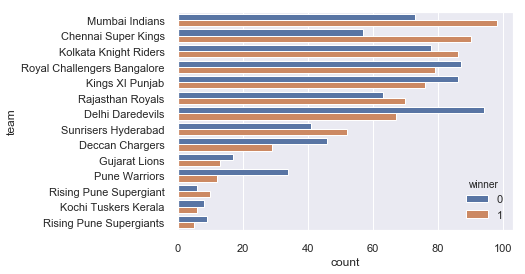

In [39]:
win_loss_data = deliveries_overall_data.groupby(['match_id','team'])['winner'].max().reset_index()

sns.countplot(y='team', data=win_loss_data, hue='winner',order=win_loss_data[win_loss_data['winner']==1]['team'].value_counts().index)


You can see that __Mumbai Indians__ won most matches followed by __Chennai Super Kings__. To know the exact count:

- Using groupby

In [40]:
win_loss_data.groupby(['team','winner']).count()

match_id
team                        winner          
Chennai Super Kings         0             57
                            1             90
Deccan Chargers             0             46
                            1             29
Delhi Daredevils            0             94
                            1             67
Gujarat Lions               0             17
                            1             13
Kings XI Punjab             0             86
                            1             76
Kochi Tuskers Kerala        0              8
                            1              6
Kolkata Knight Riders       0             78
                            1             86
Mumbai Indians              0             73
                            1             98
Pune Warriors               0             34
                            1             12
Rajasthan Royals            0             63
                            1             70
Rising Pune Supergiant      0              6
                            1             10
Rising Pune Supergiants     0              9
                            1              5
Royal Challengers Bangalore 0             87
                            1             79
Sunrisers Hyderabad         0             41
                            1             52

Notice that __Mumbai Indians__ won most 98, followed by __Chennai Super Kings__ (90).

Text(0.5, 1.0, 'Lossers')

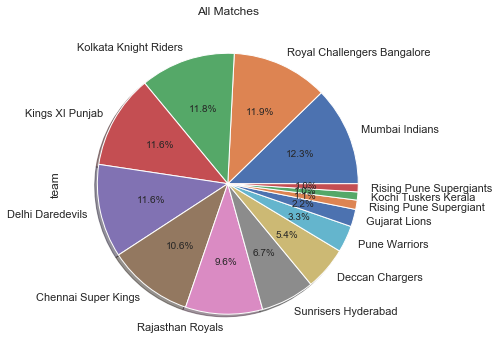

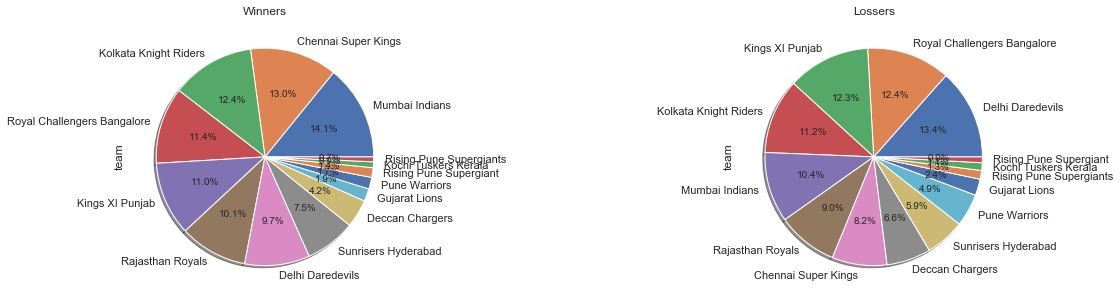

In [41]:
win_loss_data['team'].value_counts().plot.pie(autopct='%1.1f%%',y='winner',shadow=True,figsize=(6,6), title='All Matches')

f,ax = plt.subplots(1,2,figsize=(20,5))

win_loss_data['team'][win_loss_data['winner'] == 1].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
win_loss_data['team'][win_loss_data['winner'] == 0].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
#ax[0].set_title('Total Matches')
ax[0].set_title('Winners')
ax[1].set_title('Lossers')


In [42]:
print('Total matches played: ',len(win_loss_data['match_id'].unique()))

for team in win_loss_data['team'].unique():
    print(team,' winning %: ',(win_loss_data[win_loss_data['team'] == team]['winner'].sum()/win_loss_data[win_loss_data['team'] == team]['winner'].count())*100,'%')
    


Total matches played:  696
Royal Challengers Bangalore  winning %:  47.59036144578313 %
Sunrisers Hyderabad  winning %:  55.91397849462365 %
Mumbai Indians  winning %:  57.30994152046783 %
Rising Pune Supergiant  winning %:  62.5 %
Gujarat Lions  winning %:  43.333333333333336 %
Kolkata Knight Riders  winning %:  52.4390243902439 %
Kings XI Punjab  winning %:  46.913580246913575 %
Delhi Daredevils  winning %:  41.61490683229814 %
Chennai Super Kings  winning %:  61.224489795918366 %
Rajasthan Royals  winning %:  52.63157894736842 %
Deccan Chargers  winning %:  38.666666666666664 %
Kochi Tuskers Kerala  winning %:  42.857142857142854 %
Pune Warriors  winning %:  26.08695652173913 %
Rising Pune Supergiants  winning %:  35.714285714285715 %


Above data confirm that Mumbai Indians won most matches, however Chennai Super Kings has highest winning % of 61.22

<a id=section402></a>

### 4.2 How many matches lasted till last over?

We are analyzing 325 matches played between 2008 and 2018

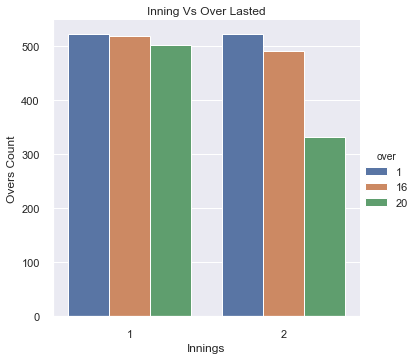

In [43]:
ax=sns.catplot(x='inning', hue='over',  data=deliveries_summay_data[deliveries_summay_data['over'].isin([1,16,20])],kind='count', estimator=lambda x: len(x) / len(deliveries_summay_data[deliveries_summay_data['over'].isin([1,16,20])]) * 100)
ax.set(xlabel="Innings", ylabel='Overs Count',title='Inning Vs Over Lasted')



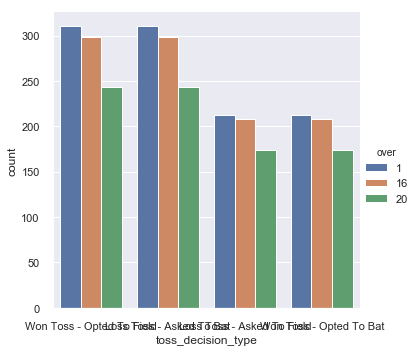

In [44]:
ax=sns.catplot(x='toss_decision_type', hue='over',  data=deliveries_summay_data[deliveries_summay_data['over'].isin([1,16,20])],kind='count')

- __Notice:__ Above graph is showing innings 1st over count agains 20th over count to analyze how many inning lasted till last over.

- __Conclusion__ In all 750 (325*2) innigns, most of 1st innings lasted till last over. However, quite a few 2nd innngs didn't last till last over. Good amount of matches went into last 5 overs (evident from 16th over plot)
    

[Text(0, 0.5, 'Over Group'),
 Text(0.5, 1.0, 'Over distribution % - Last Innings')]

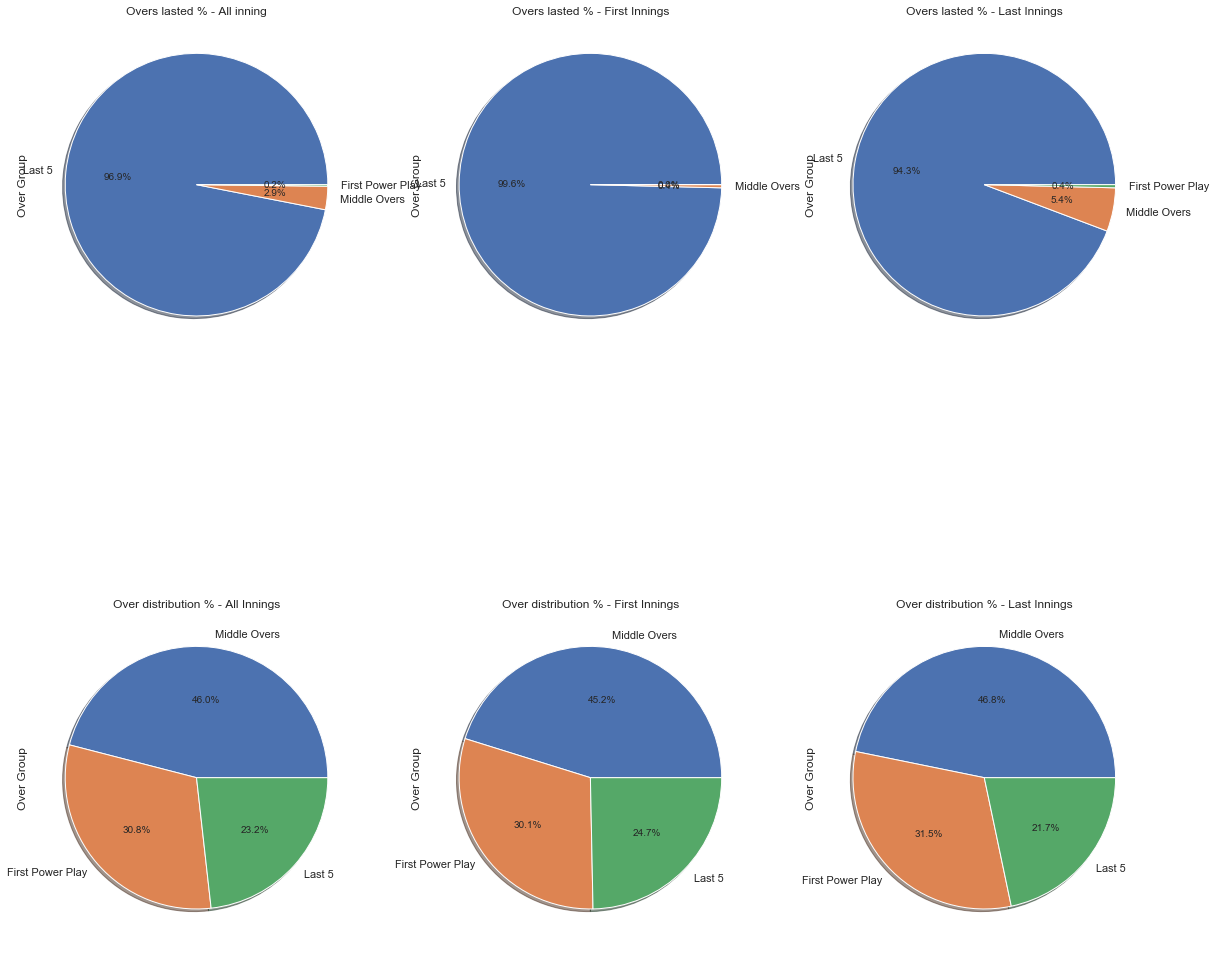

In [45]:
last_over_by_inning_data=deliveries_summay_data.groupby(['match_id','inning'])['over'].max().reset_index()

last_over_by_inning_data['over']=pd.cut(last_over_by_inning_data['over'].dropna(),
                         [1,6,15,20],
                         labels=['First Power Play','Middle Overs','Last 5'], include_lowest=True)

f421,ax421 = plt.subplots(ncols=3, nrows=2, figsize=(1,1))

last_over_by_inning_data['over'].value_counts().plot.pie(autopct='%1.1f%%',y='inning',ax=ax421[0][0],shadow=True)
last_over_by_inning_data[last_over_by_inning_data['inning']==1]['over'].value_counts().plot.pie(autopct='%1.1f%%',y='inning',ax=ax421[0][1],shadow=True)
last_over_by_inning_data[last_over_by_inning_data['inning']==2]['over'].value_counts().plot.pie(autopct='%1.1f%%',y='inning',ax=ax421[0][2],shadow=True,figsize=(20,20))
ax421[0][0].set(title='Overs lasted % - All inning',ylabel='Over Group')
ax421[0][1].set(title='Overs lasted % - First Innings',ylabel='Over Group')
ax421[0][2].set(title='Overs lasted % - Last Innings',ylabel='Over Group')

deliveries_summay_data['over_group'].value_counts().plot.pie(autopct='%1.1f%%',y='over',ax=ax421[1][0],shadow=True)
deliveries_summay_data[deliveries_summay_data['inning']==1]['over_group'].value_counts().plot.pie(autopct='%1.1f%%',y='over',ax=ax421[1][1],shadow=True)
deliveries_summay_data[deliveries_summay_data['inning']==2]['over_group'].value_counts().plot.pie(autopct='%1.1f%%',y='over',ax=ax421[1][2],shadow=True,figsize=(20,20))
ax421[1][0].set(title='Over distribution % - All Innings', ylabel='Over Group')
ax421[1][1].set(title='Over distribution % - First Innings', ylabel='Over Group')
ax421[1][2].set(title='Over distribution % - Last Innings',ylabel='Over Group')


Above pie charts confirms 95.4% of innings went past 15th over mark. 99.2% of first inning went past 15th over mark and 91.6% of second inning went past 15th over mark.

Over distribution pie chart shows over all 46.1% overs falls under 'Middle Overs' group, 31.3% under 'First Power Play' group and 22.9% under 'Last 5' group.

In [46]:
deliveries_summay_data.columns

Index(['match_id', 'inning', 'team', 'opponent_team', 'over', 'season',
       'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner',
       'venue', 'toss_decision_type', 'no_balls', 'wide_balls', 'wicket_balls',
       'dot_balls', 'boundary_balls', 'over_group'],
      dtype='object')

### 4.3 How did team performed in last five overs (key statistics) ?

<a id=section403></a>

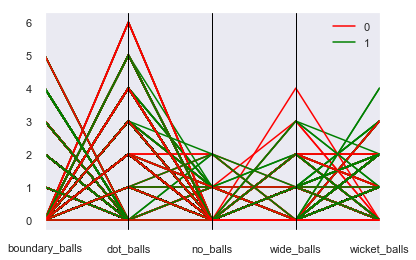

In [47]:
from pandas.plotting import parallel_coordinates

runs = (deliveries_summay_data[(deliveries_summay_data['over_group']=='Last 5')])

parallel_coordinates(runs,'winner',cols=['boundary_balls','dot_balls', 'no_balls', 'wide_balls', 'wicket_balls'], color = ['red', 'green','yellow'])

- Above plot shows number boundaries, dot balls bowled, no balls bowled, wide balls bowled and wickets taken per over in last 5 overs. 
- Green color is showing winner and red is losser
- __Conclusion__: More boundaries, dot balls and wicket balls more chances of winning match.

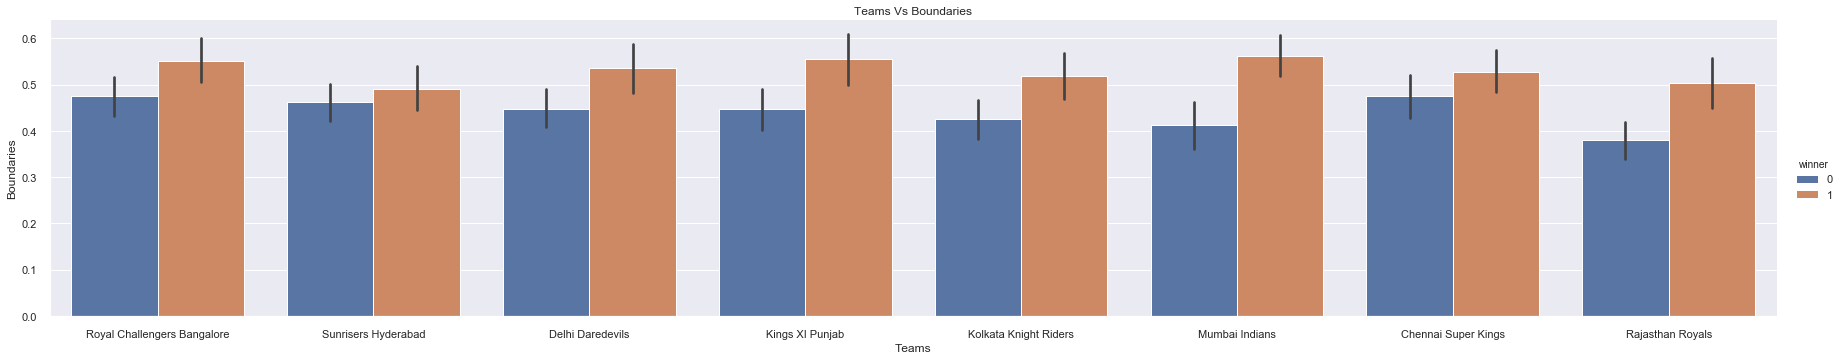

In [48]:
ax4211 = sns.catplot(y='boundary_balls', x='team', hue='winner',  data=deliveries_summay_data,kind='bar', aspect=5, height=5)
ax4211.set(xlabel='Teams',ylabel='Boundaries', title='Teams Vs Boundaries')


Consistent trend of team hitting more boundaries won more matches.

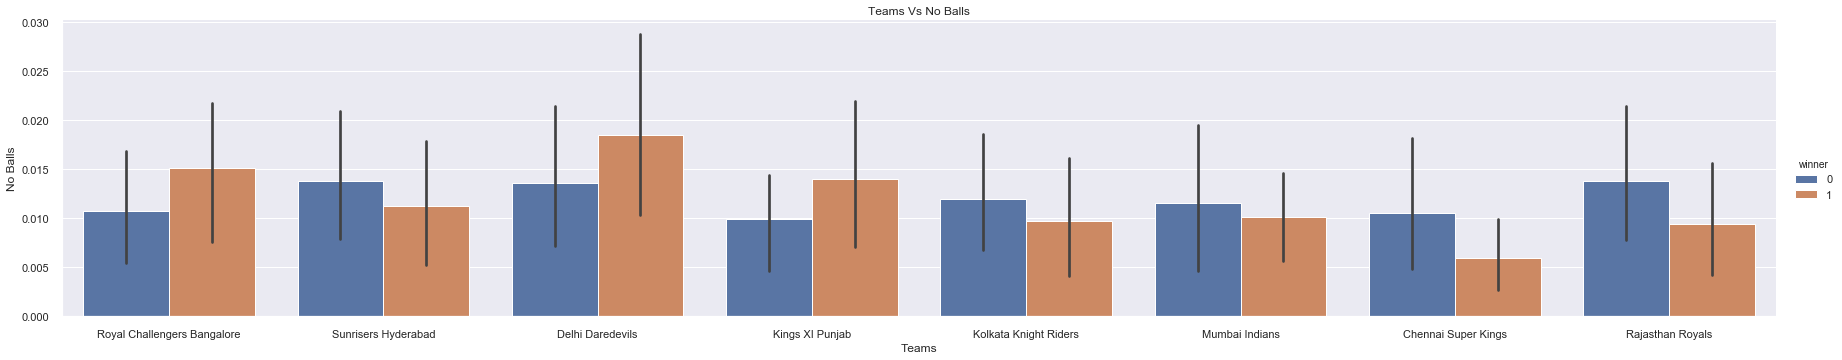

In [49]:
ax4212 = sns.catplot(y='no_balls', x='team', hue='winner',  data=deliveries_summay_data,kind='bar', aspect=5, height=5)
ax4212.set(xlabel='Teams',ylabel='No Balls', title='Teams Vs No Balls')


No consistent pattern in wide ball statistics. 

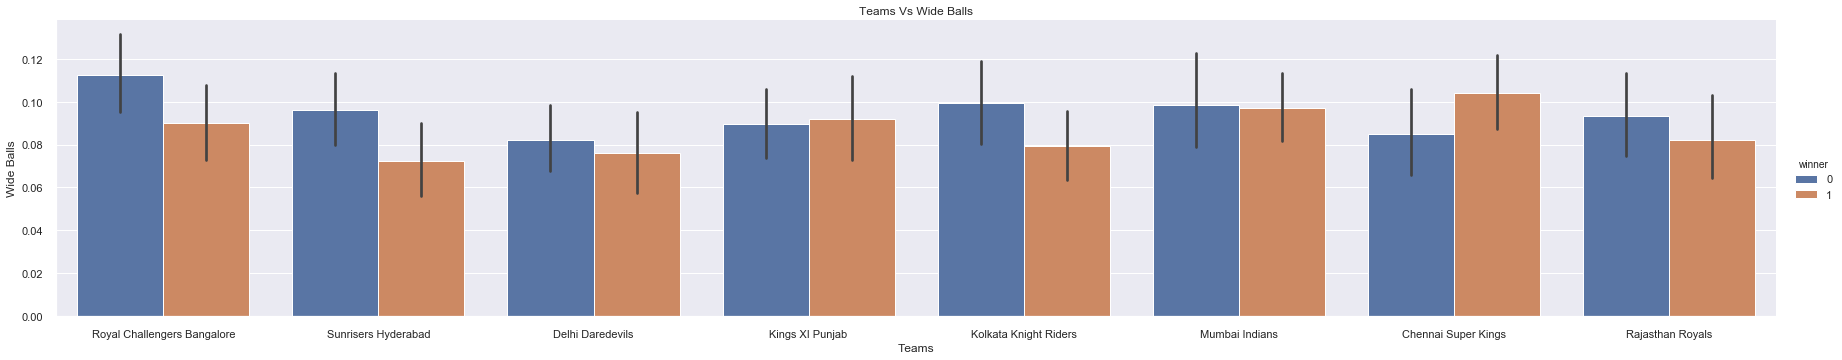

In [50]:
ax4213 = sns.catplot(y='wide_balls', x='team', hue='winner',  data=deliveries_summay_data,kind='bar', aspect=5, height=5)
ax4213.set(xlabel='Teams',ylabel='Wide Balls', title='Teams Vs Wide Balls')


No consistent pattern in wide ball statistics. 

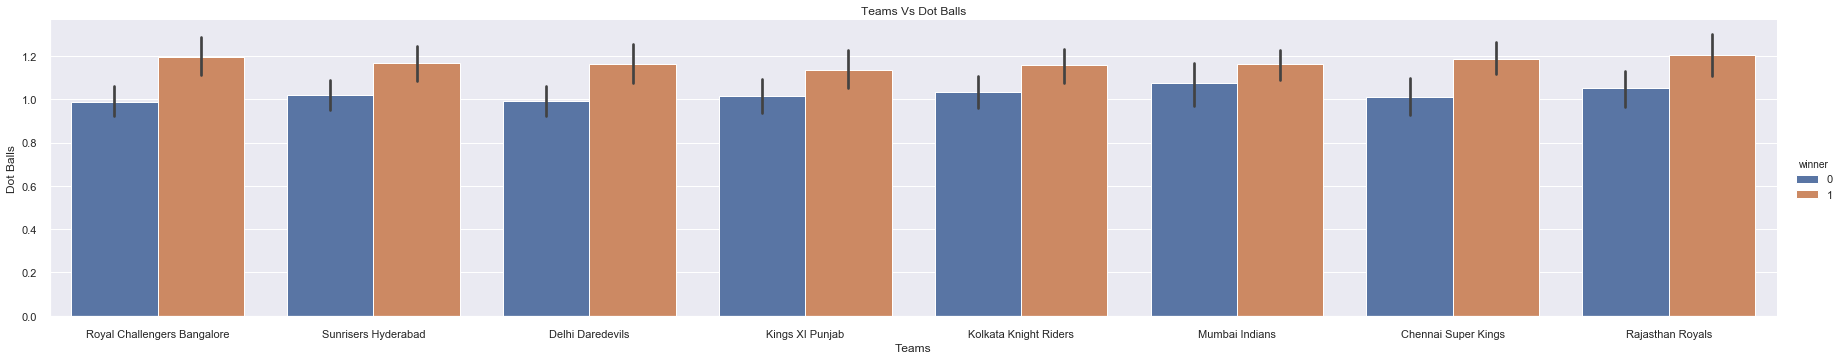

In [51]:
ax4214 = sns.catplot(y='dot_balls', x='team', hue='winner',  data=deliveries_summay_data,kind='bar', aspect=5, height=5)
ax4214.set(xlabel='Teams',ylabel='Dot Balls', title='Teams Vs Dot Balls')


Consistent trend of team bowling more dot balls won more matches.

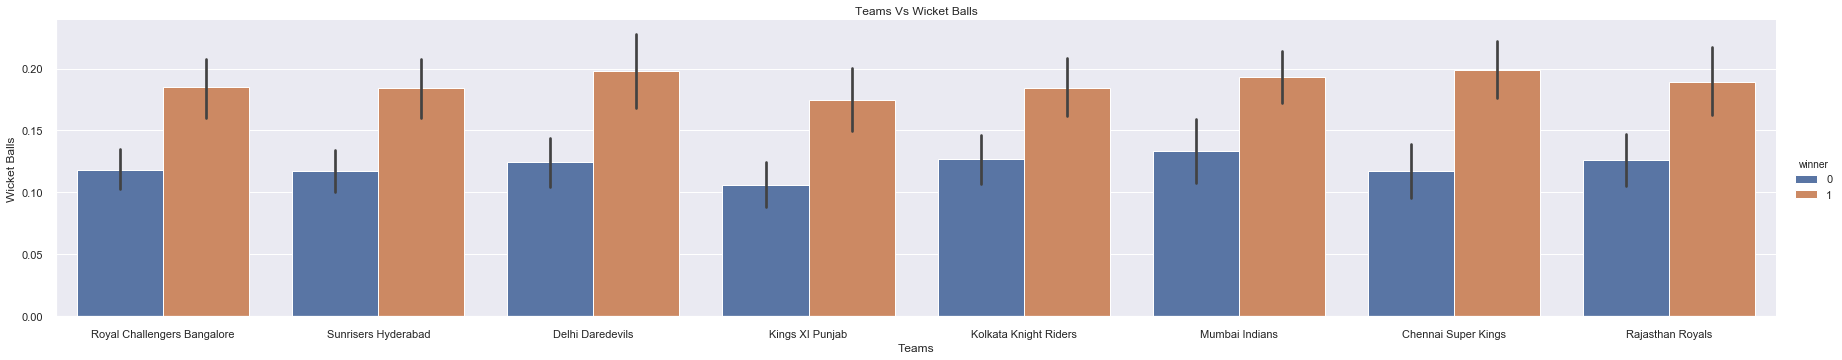

In [52]:
ax4215 = sns.catplot(y='wicket_balls', x='team', hue='winner',  data=deliveries_summay_data,kind='bar', aspect=5, height=5)
ax4215.set(xlabel='Teams',ylabel='Wicket Balls', title='Teams Vs Wicket Balls')


Team bowling more wicket balls ended up winning more matches.

### 4.4 Wins/losses - Comparing key stats and bat first/bowl first games.

<a id=section404></a>

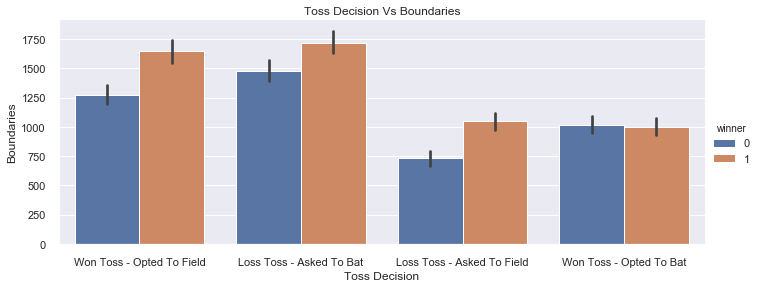

In [53]:
ax472=sns.catplot(y='boundary_balls', x='toss_decision_type', hue='winner',  data=deliveries_summay_data,kind='bar', height=4, aspect=2.5, estimator=sum)
ax472.set(xlabel='Toss Decision',ylabel='Boundaries', title='Toss Decision Vs Boundaries')


Toss has no impact on boundary ball to win/loss stats.

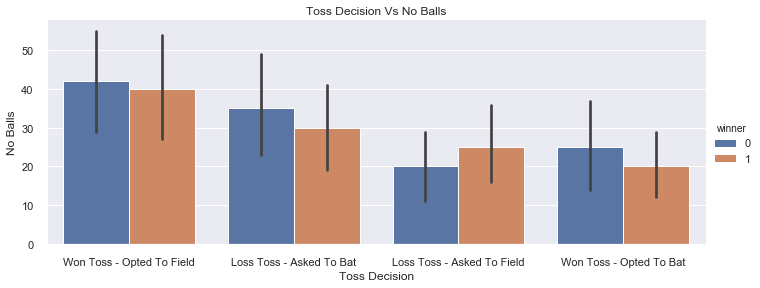

In [54]:

ax473=sns.catplot(y='no_balls', x='toss_decision_type', hue='winner',  data=deliveries_summay_data,kind='bar', height=4, aspect=2.5, estimator=sum  )
ax473.set(xlabel='Toss Decision',ylabel='No Balls', title='Toss Decision Vs No Balls')

Team winning toss bowled more no balls and lost more matches. Team lossing toss bowled less no balls.

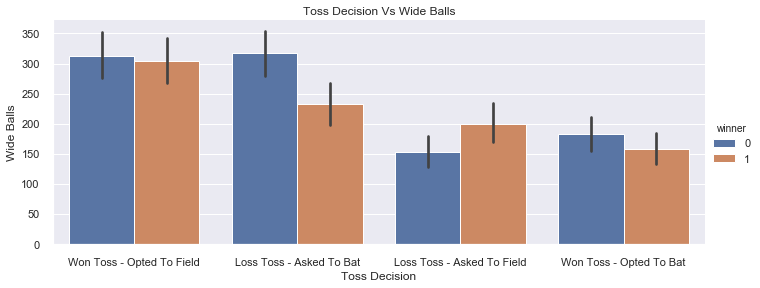

In [55]:
ax473=sns.catplot(y='wide_balls', x='toss_decision_type', hue='winner',  data=deliveries_summay_data,kind='bar', height=4, aspect=2.5, estimator=sum  )
ax473.set(xlabel='Toss Decision',ylabel='Wide Balls', title='Toss Decision Vs Wide Balls')

Mix trend, no specific pattern.

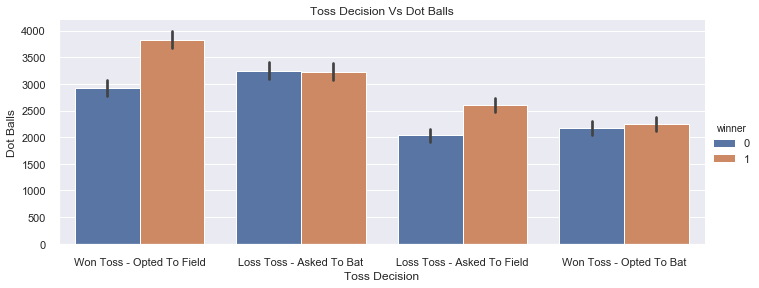

In [56]:
ax474=sns.catplot(y='dot_balls', x='toss_decision_type', hue='winner',  data=deliveries_summay_data,kind='bar', height=4, aspect=2.5,estimator=sum  )
ax474.set(xlabel='Toss Decision',ylabel='Dot Balls', title='Toss Decision Vs Dot Balls')

Toss has no impact on dot ball to win/loss stats.

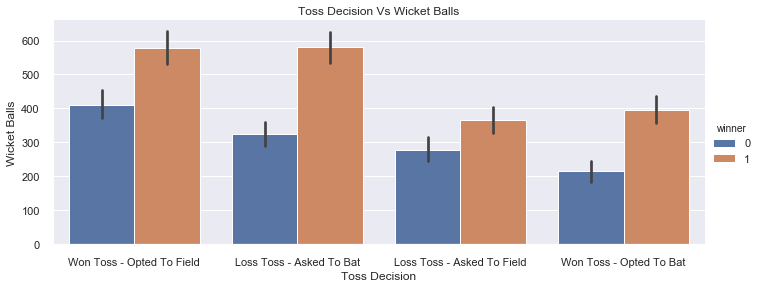

In [104]:
ax475=sns.catplot(y='wicket_balls', x='toss_decision_type', hue='winner',  data=deliveries_summay_data,kind='bar', height=4, aspect=2.5, estimator=sum  )
ax475.set(xlabel='Toss Decision',ylabel='Wicket Balls', title='Toss Decision Vs Wicket Balls')

__Conclusion__: Irrespective of toss decision, team hitting more boundaries, bowling more dot and wicket balls won more matches.

Team winnng toss blowed more no balls and ended uo lossing more matches.

<a id=section405></a>

### 4.5 Wins/losses - Comparing key stats and bat toss win/loss games
### 4.6 Segment over in bins and compare performance.

<a id=section406></a>

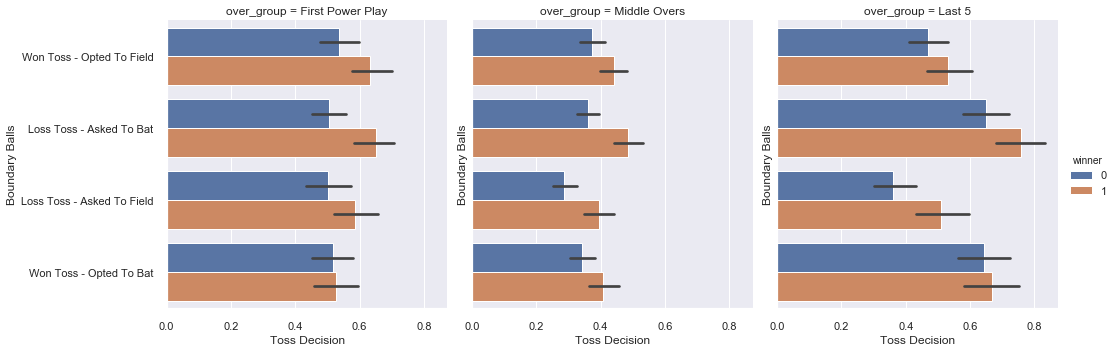

In [58]:
ax=sns.catplot(x='boundary_balls', y='toss_decision_type', hue='winner',  data=deliveries_summay_data,kind='bar', col='over_group')
ax.set(xlabel='Toss Decision',ylabel='Boundary Balls')

- __Conclusion__ : Hitting more boundaries has helped teams to win more matches.

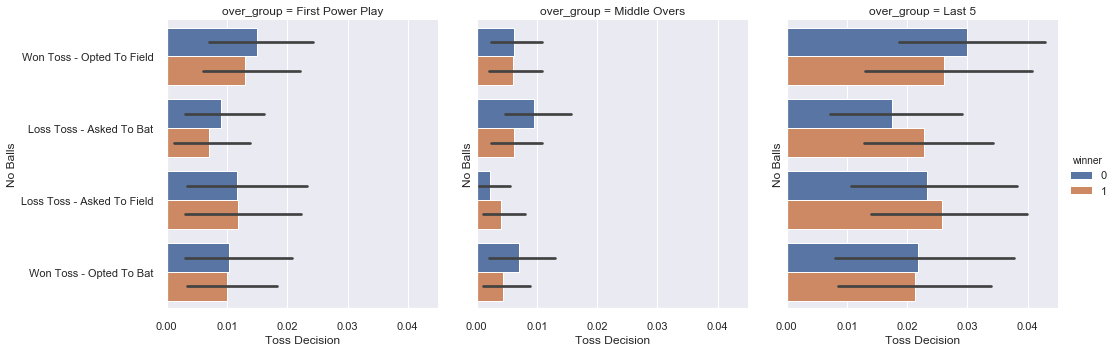

In [59]:
ax=sns.catplot(x='no_balls', y='toss_decision_type', hue='winner',  data=deliveries_summay_data,kind='bar', col='over_group')
ax.set(xlabel='Toss Decision',ylabel='No Balls')

- __Conclusion__ : Mix trend, no specific pattern

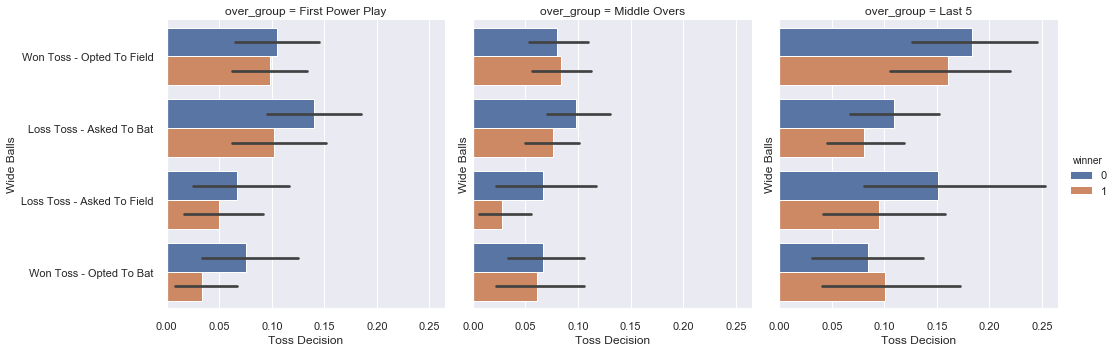

In [60]:
ax=sns.catplot(x='wide_balls', y='toss_decision_type', hue='winner',  data=deliveries_summay_data[(deliveries_summay_data['season'].isin([2015,2016,2017,2018]))],kind='bar', col='over_group')
ax.set(xlabel='Toss Decision',ylabel='Wide Balls')

- __Conclusion__ : Mix trend, no specific pattern

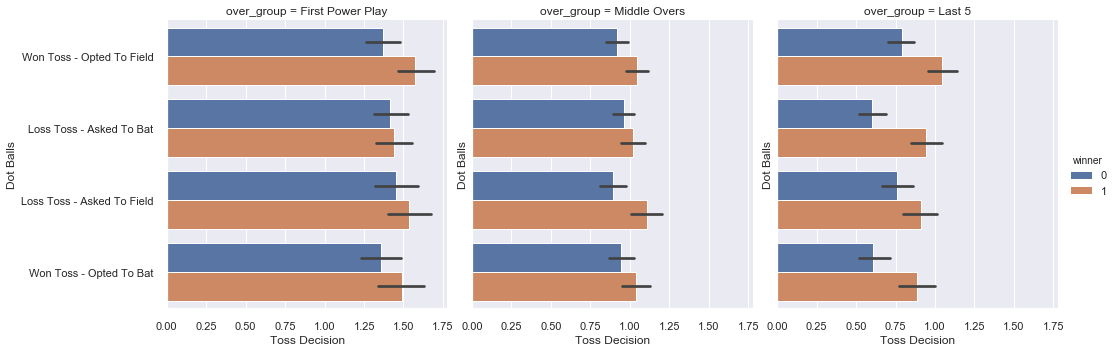

In [61]:
ax=sns.catplot(x='dot_balls', y='toss_decision_type', hue='winner',  data=deliveries_summay_data,kind='bar', col='over_group')
ax.set(xlabel='Toss Decision',ylabel='Dot Balls')

Conclusion : Team bowling more dot balls won more matches. This is applicable consistently across over groups.

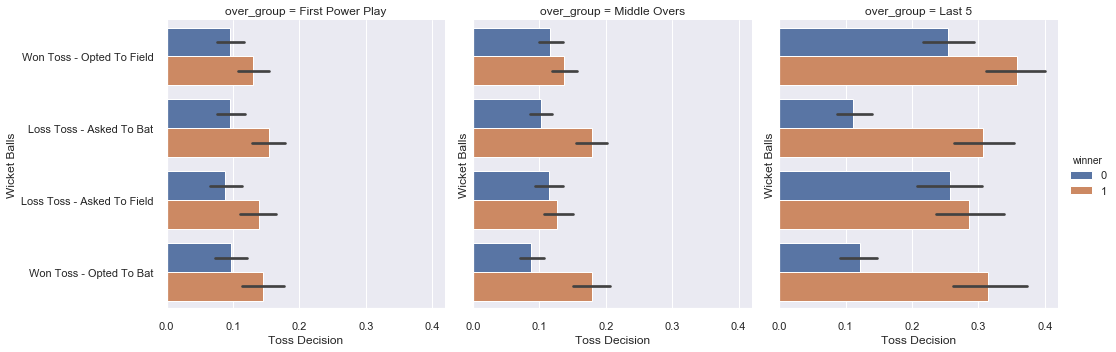

In [62]:
ax=sns.catplot(x='wicket_balls', y='toss_decision_type', hue='winner',  data=deliveries_summay_data,kind='bar', col='over_group')
ax.set(xlabel='Toss Decision',ylabel='Wicket Balls')

Conclusion : Team bowling more wicket balls won more matches. This is applicable consistently across over groups.

### 4.7 Draw pair plot to know the joint relationship between 'Wicket','Boundaries','Dot Balls' and 'Result'

<a id=section407></a>

Text(0.5, 1.0, 'Pair Plot')

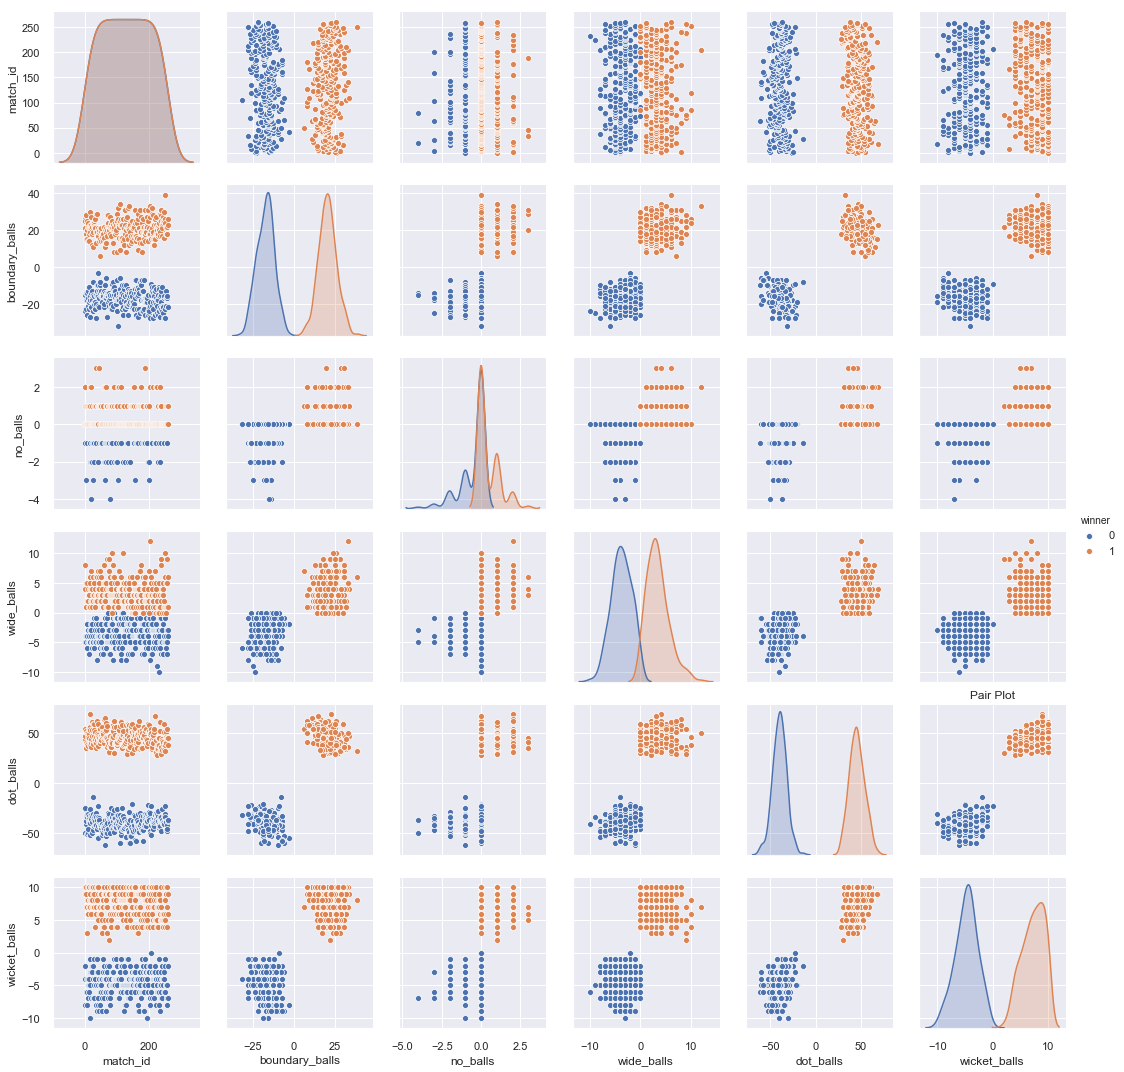

In [63]:

inning_summary_data= deliveries_summay_data.groupby(['match_id', 'winner']).agg({
    'no_balls':sum,'wide_balls':sum, 'wicket_balls':sum, 'dot_balls':sum, 'boundary_balls':sum
})

inning_summary_data=inning_summary_data.loc[:].reset_index()

# Mark keys statistics -ve to compare them side by side and to avoid overlap.
inning_summary_data['boundary_balls']=np.where(inning_summary_data['winner']==0,inning_summary_data['boundary_balls']*-1,inning_summary_data['boundary_balls'])
inning_summary_data['no_balls']=np.where(inning_summary_data['winner']==0,inning_summary_data['no_balls']*-1,inning_summary_data['no_balls'])
inning_summary_data['wide_balls']=np.where(inning_summary_data['winner']==0,inning_summary_data['wide_balls']*-1,inning_summary_data['wide_balls'])
inning_summary_data['dot_balls']=np.where(inning_summary_data['winner']==0,inning_summary_data['dot_balls']*-1,inning_summary_data['dot_balls'])
inning_summary_data['wicket_balls']=np.where(inning_summary_data['winner']==0,inning_summary_data['wicket_balls']*-1,inning_summary_data['wicket_balls'])



from sklearn.preprocessing import LabelEncoder                                    # Label encoder is used to transform non-numerical labels to numerical labels.
number = LabelEncoder()                                                           # Here as our data set consists only of categorical values except age
inning_summary_data['match_id'] = number.fit_transform(inning_summary_data['match_id'])

sns.pairplot(inning_summary_data[['match_id','boundary_balls','no_balls','wide_balls','dot_balls','wicket_balls','winner']],vars = ['match_id','boundary_balls','no_balls','wide_balls','dot_balls','wicket_balls'],hue="winner", dropna=True)

plt.title('Pair Plot')



__Note__: Above data set was manipulated to plot key stats on negative axis to avoid overlap and to have comapre win vs lost data.

Plot above shows winning side bowled more dot balls, wicket balls and scored more boundaries. 

In [103]:
match_summary_data= inning_summary_data.groupby(['match_id']).agg({
    'no_balls':sum,'wide_balls':sum, 'wicket_balls':sum, 'dot_balls':sum, 'boundary_balls':sum
})
match_summary_data=match_summary_data.loc[:].reset_index()

print('Total matches played: ',match_summary_data['match_id'].count())
print('% matches won scoring more boundaries: ',(match_summary_data[match_summary_data['boundary_balls']>0]['match_id'].count()/match_summary_data['match_id'].count())*100)
print('% matches won scoring less boundaries: ',(match_summary_data[match_summary_data['boundary_balls']<0]['match_id'].count()/match_summary_data['match_id'].count())*100)
print('% matches won bowling more no balls: ',(match_summary_data[match_summary_data['no_balls']>0]['match_id'].count()/match_summary_data['match_id'].count())*100)
print('% matches won bowling less no balls: ',(match_summary_data[match_summary_data['no_balls']<0]['match_id'].count()/match_summary_data['match_id'].count())*100)

print('% matches won bowling more wide balls: ',(match_summary_data[match_summary_data['wide_balls']>0]['match_id'].count()/match_summary_data['match_id'].count())*100)
print('% matches won bowling less wide balls: ',(match_summary_data[match_summary_data['wide_balls']<0]['match_id'].count()/match_summary_data['match_id'].count())*100)

print('% matches won bowling more dot balls: ',(match_summary_data[match_summary_data['dot_balls']>0]['match_id'].count()/match_summary_data['match_id'].count())*100)
print('% matches won bowling less dot balls: ',(match_summary_data[match_summary_data['dot_balls']<0]['match_id'].count()/match_summary_data['match_id'].count())*100)

print('% matches won bowling more wicket balls: ',(match_summary_data[match_summary_data['wicket_balls']>0]['match_id'].count()/match_summary_data['match_id'].count())*100)
print('% matches won bowling less wicket balls: ',(match_summary_data[match_summary_data['wicket_balls']<0]['match_id'].count()/match_summary_data['match_id'].count())*100)

Total matches played:  261
% matches won scoring more boundaries:  72.41379310344827
% matches won scoring less boundaries:  19.54022988505747
% matches won bowling more no balls:  23.371647509578544
% matches won bowling less no balls:  20.306513409961685
% matches won bowling more wide balls:  39.84674329501915
% matches won bowling less wide balls:  45.593869731800766
% matches won bowling more dot balls:  70.49808429118774
% matches won bowling less dot balls:  24.521072796934863
% matches won bowling more wicket balls:  77.77777777777779
% matches won bowling less wicket balls:  13.793103448275861


Above stats shows team scoring more boundaries, bowling more dot and wicket balls end up winning more matches.

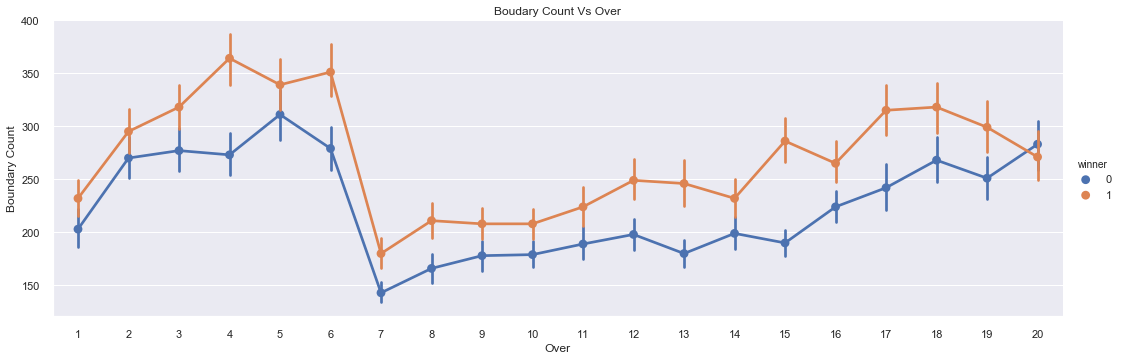

In [65]:
ax63=sns.catplot(y='boundary_balls', x='over', hue='winner',  data=deliveries_summay_data[(deliveries_summay_data['boundary_balls']>0) ],kind='point', aspect=3, estimator=sum)
ax63.set(xlabel='Over',ylabel='Boundary Count', title='Boudary Count Vs Over')


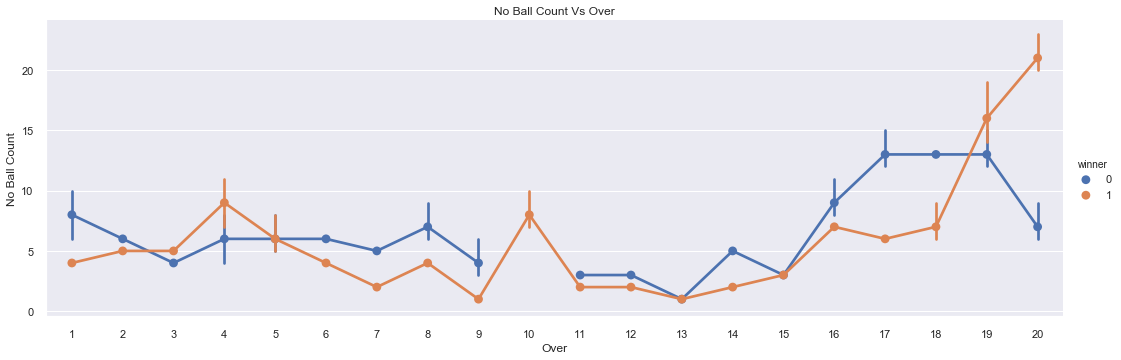

In [66]:
ax85=sns.catplot(y='no_balls', x='over', hue='winner',  data=deliveries_summay_data[(deliveries_summay_data['no_balls']>0) ],kind='point', aspect=3, estimator=sum)
ax85.set(xlabel='Over',ylabel='No Ball Count', title='No Ball Count Vs Over')


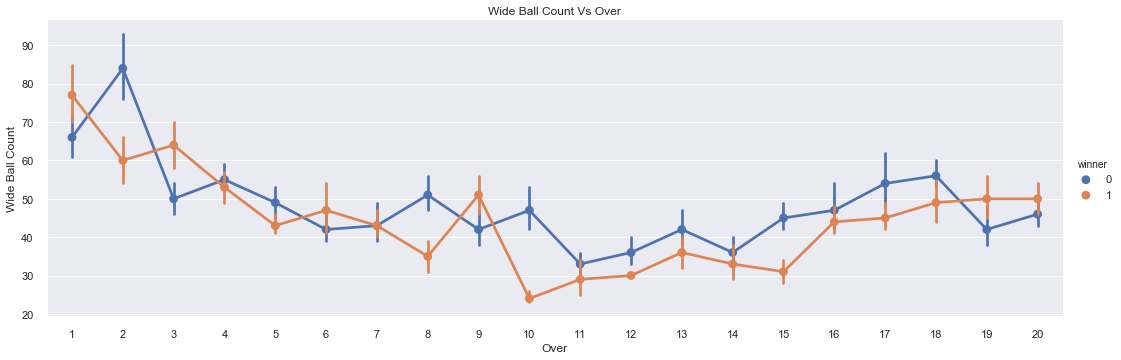

In [67]:
ax23=sns.catplot(y='wide_balls', x='over', hue='winner',  data=deliveries_summay_data[(deliveries_summay_data['wide_balls']>0) ],kind='point', aspect=3, estimator=sum)
ax23.set(xlabel='Over',ylabel='Wide Ball Count', title='Wide Ball Count Vs Over')

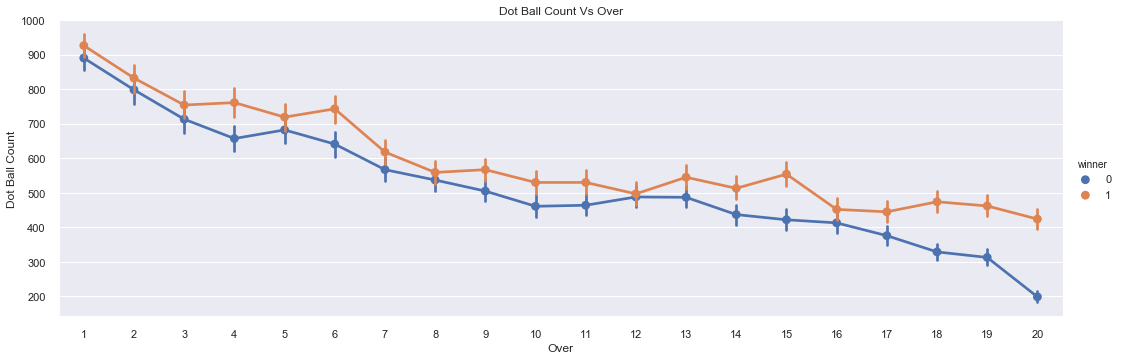

In [68]:
ax66=sns.catplot(y='dot_balls', x='over', hue='winner',  data=deliveries_summay_data[(deliveries_summay_data['dot_balls']>0) ],kind='point', aspect=3, estimator=sum)
ax66.set(xlabel='Over',ylabel='Dot Ball Count', title='Dot Ball Count Vs Over')

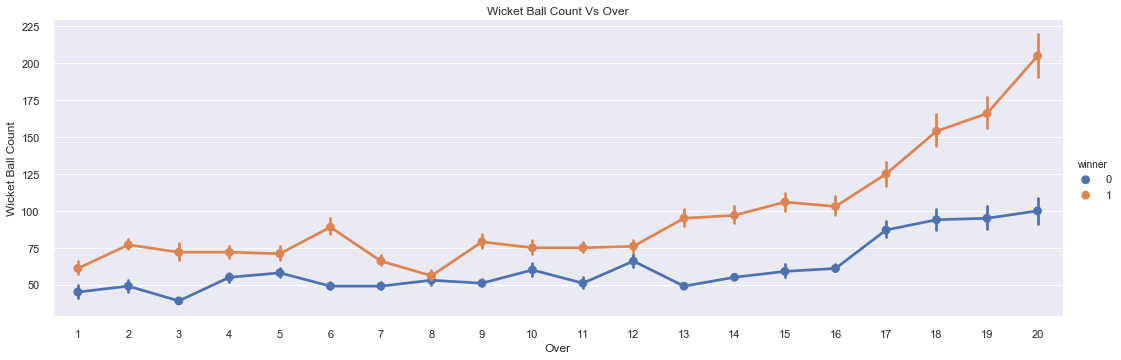

In [69]:
ax381=sns.catplot(y='wicket_balls', x='over', hue='winner',  data=deliveries_summay_data[(deliveries_summay_data['wicket_balls']>0) ],kind='point', aspect=3, estimator=sum)
ax381.set(xlabel='Over',ylabel='Wicket Ball Count', title='Wicket Ball Count Vs Over')

__Conclusion__: Above plots shows below
                Count of boundaries  per Over
                Count of no balls per Over
                Count of wide balls per Over
                Count of dot balls per Over
                Count of wickets taken per Over, respectivly.
                
- Team scoring more boundries, bowling more dot balls and taking more wickets ended up winning more matches.              



  ### 4.8 Establish coorelation between all the features using heatmap.

<a id=section408></a>

Text(0.5, 1.0, 'Correlation - All Overs')

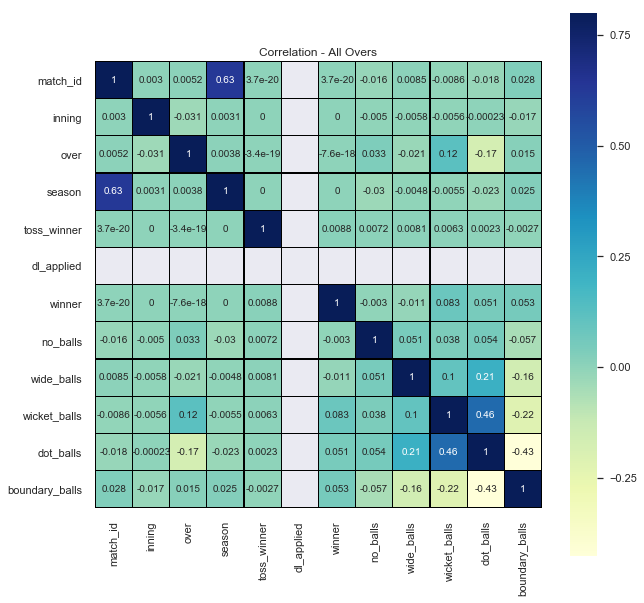

In [70]:
corr = deliveries_summay_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation - All Overs')

Text(0.5, 1.0, 'Correlation - Last 5 Overs')

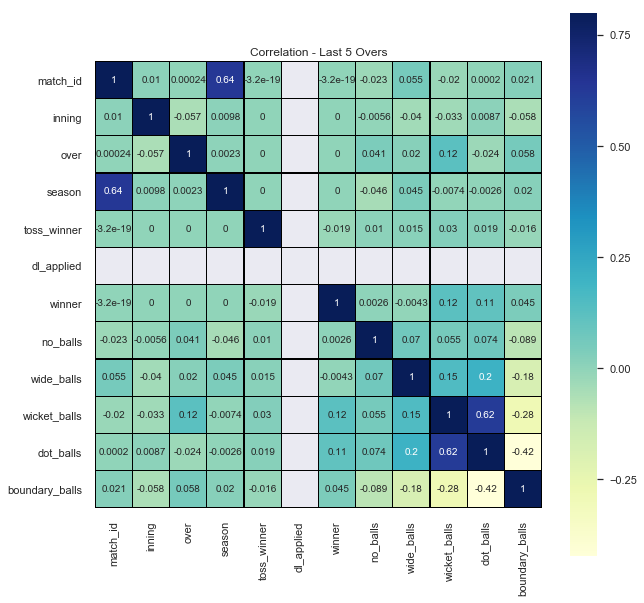

In [71]:
corr_last5 = deliveries_summay_data[(deliveries_summay_data['over_group']=='Last 5')].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_last5,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation - Last 5 Overs')

Text(0.5, 1.0, 'Correlation - First Power Play')

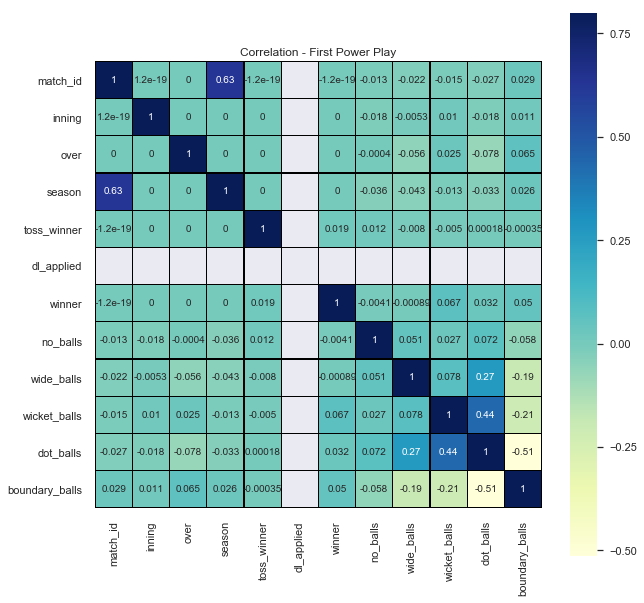

In [72]:
corr_pp = deliveries_summay_data[(deliveries_summay_data['over_group']=='First Power Play')].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_pp,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation - First Power Play')

Text(0.5, 1.0, 'Correlation - Middle Overs')

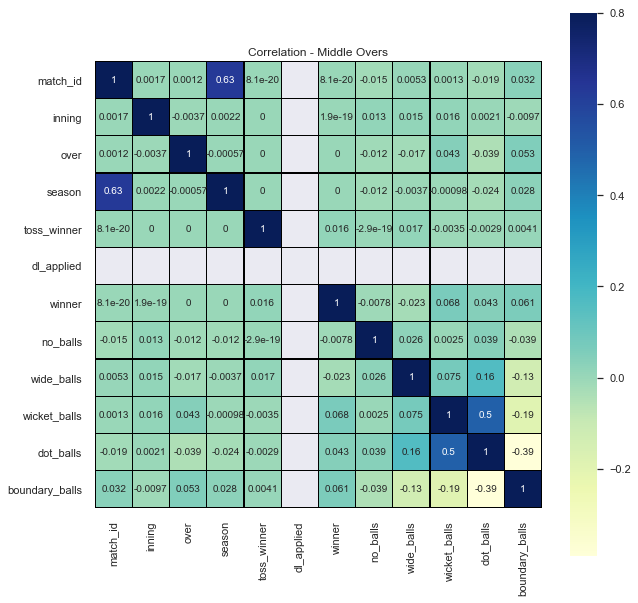

In [73]:
corr_mo = deliveries_summay_data[(deliveries_summay_data['over_group']=='Middle Overs')].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mo,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation - Middle Overs')

__Conclusion__: 
    Match and season has strong positive correlation. 
    Wicket ball and over has positive correlation. 
    This obivious, lets ignore this.
    
Lets review __Winner__ correlation :
- Winner - Dot, Wicket and Boundary ball count correlation remain positve across over groups.Correlation was highest in last five overs. Dot balls - 0.13, Wicket balls - 0.12 , Boundary balls - 0.036 and Toss winner - 0.028.
- Winner - No balls and wide balls correlation fluctuated from positive to negative across over group.

Text(0.5, 1.0, 'Relation Between boundary balls and winner')

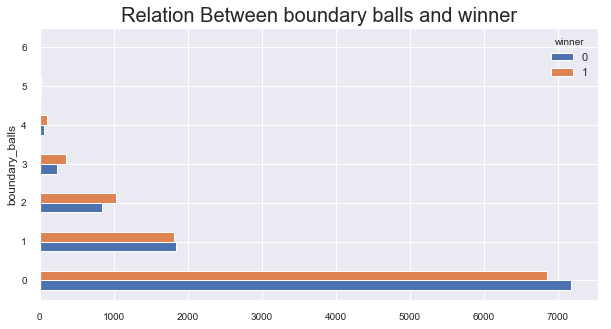

In [75]:
relation = pd.crosstab( deliveries_summay_data.boundary_balls, [deliveries_summay_data.winner])
relation.plot.barh(figsize=(10,5))
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Relation Between boundary balls and winner',size=20)

Text(0.5, 1.0, 'Relation Between no balls and winner')

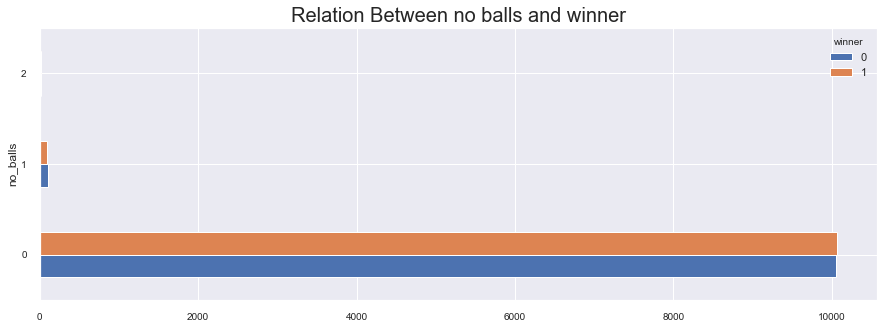

In [76]:
relation = pd.crosstab( deliveries_summay_data.no_balls, deliveries_summay_data.winner)
relation.plot.barh(figsize=(15,5))
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Relation Between no balls and winner',size=20)

Text(0.5, 1.0, 'Relation Between wide balls and winner')

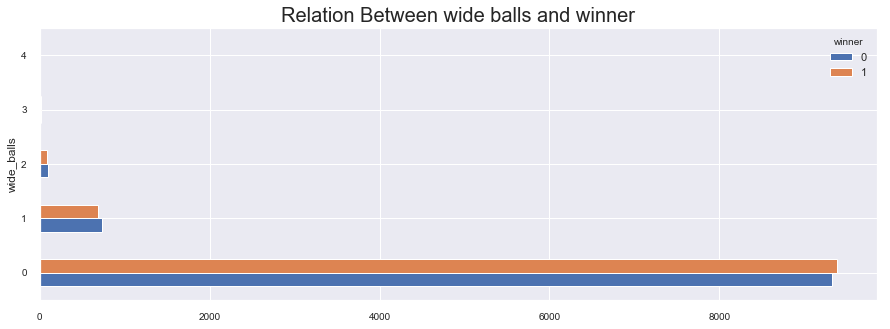

In [77]:
relation = pd.crosstab( deliveries_summay_data.wide_balls, deliveries_summay_data.winner)
relation.plot.barh(figsize=(15,5))
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Relation Between wide balls and winner',size=20)

Text(0.5, 1.0, 'Relation Between dot balls and winner')

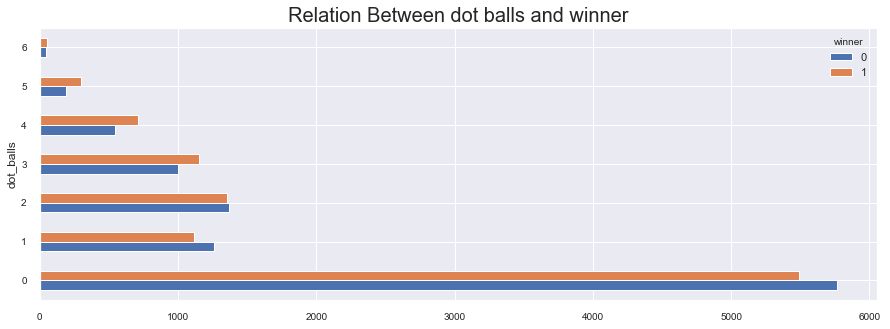

In [78]:
relation = pd.crosstab( deliveries_summay_data.dot_balls, deliveries_summay_data.winner)
relation.plot.barh(figsize=(15,5))
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Relation Between dot balls and winner',size=20)

Text(0.5, 1.0, 'Relation Between wicket balls and winner')

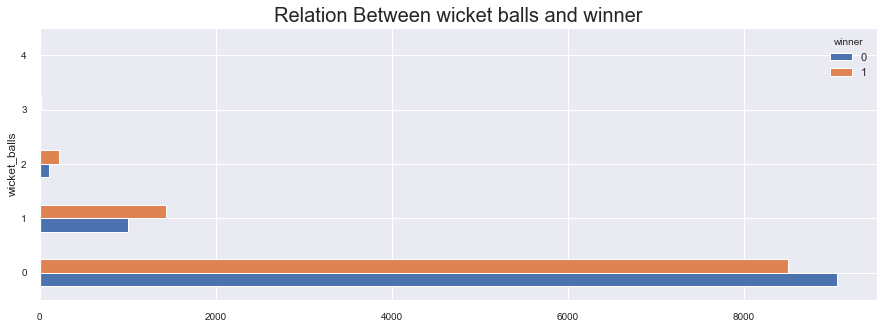

In [79]:
relation = pd.crosstab( deliveries_summay_data.wicket_balls, deliveries_summay_data.winner)
relation.plot.barh(figsize=(15,5))
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Relation Between wicket balls and winner',size=20)

In [ ]:
Team won more matches as count of boundry, dot and wicket balls  per over went up. However no balls and wide balls count per over has mix trend.

### 4.9 Hypothesis: Impact of team performance in last five overs.

<a id=section409></a>

On studying Questionnaire 4.1 and 4.2 we observed that overall 696 matches were played between 2008 and 2018. 

__Mumbai Indians__ played most of matches __(12.3%)__, followed by Royal Challengers Bangalore(11.9%)
__Mumbai Indian__ won __14.1%__ of total matches, followed by Chennai Super Kings 13%
__Delhi Daredevils__ lost __13.4%__ of total matches, followed by Royal Challengers Bangalore(12.4%)
__Chennai Super Kings__ has highest winning% of __61.22%__, followed by Mumbai Indians 57.30

__Inning statistics__

Overall 94.9% innings lasted till last 5 overs (16-20).
98.5% of first innings lasted till last 5 overs (16-20).
91.3% of second innings lasted till last 5 overs (16-20).

__Over segment statistics__
Overall 23% overs were bowled in last 5 overs (16-20), 24.6% in first inning and 21.4% in second inning.
Overall 45.9% overs were bowled in middle overs (7-15)

__Team performance in last 5 over__

On studying Questionnaire 4.3 and 4.8 we analyzed teams performance in first pwoer play, middle over and last 5 overs by reviewing 
- No balls bowled
- Wide balls bowled
- Dot balls bowled  
- Wicket balls bowled 
- Boundaries scored.

__Toss decision vs Winner correlation__

- Irrespective of toss decision, team hitting more boundaries, bowling more dot and wicket balls won more matches.

- Team winnng toss blowed more no balls and ended uo lossing more matches

__Key statistics vs Winner correlation__
- Winner - Dot, Wicket and Boundary ball count correlation remain positve across over groups.Correlation was highest in last five overs. Dot balls - 0.13, Wicket balls - 0.12 , Boundary balls - 0.036 and Toss winner - 0.028.
- Winner - No balls and wide balls correlation fluctuated from positive to negative across over group


<a>section2</a>

<a id=section5></a>

## 5. Conclusion 

- Good number of innings lasted till last 5 overs (16-20)
- Its observed team bowling more dot balls, wicket balls and scoring boundaries has better chance of winning matches.
- There was mix trend between number of wide balls/no balls bowled by team and result (won/loss)

__Note__: Analysis was performaed on sample 325 innings.